### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the training set 


In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [4]:
dataset_train["Close"] = pd.to_numeric(dataset_train.Close, errors='coerce')
dataset_train = dataset_train.dropna()
training_set = dataset_train.iloc[:, 4 : 5].values

In [5]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


### Perform feature scaling to transform the data

In [6]:
# Feature Scaling 
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled.shape

(1149, 1)

### Create a data structure with 60-time steps and 1 output 

In [7]:
#Creating a data structure with 60 timesteps and 1 output 
X_train = []
y_train = []
for i in range(60, 1149):
        X_train.append(training_set_scaled[i-60:i, 0])
        y_train.append(training_set_scaled[i, 0])
        
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
#Reshoping 
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1089, 60, 1)

### Import Keras library and its packages

In [9]:
# Importing the Keras libraries and packages

from keras.models import Sequential 
from keras.layers import Dense, LSTM, Dropout

### Initialize the RNN

In [10]:
# Importing the RNN
regressor = Sequential()

### Add the LSTM layers and some dropout regularization

In [11]:
# Adding the first LSTM Layer and some Dropout regularization
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

### Add the output layer.


In [12]:
# Adding the output layer
regressor.add(Dense(units =1))

### Compile the RNN

In [13]:
# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

### Fit the RNN to the training set

In [14]:
# fitting the RNN to the training set
hist = regressor.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 12s - loss: 0.1035 - 12s/epoch - 350ms/step
Epoch 2/20
35/35 - 4s - loss: 0.0782 - 4s/epoch - 102ms/step
Epoch 3/20
35/35 - 4s - loss: 0.0768 - 4s/epoch - 122ms/step
Epoch 4/20
35/35 - 3s - loss: 0.0761 - 3s/epoch - 100ms/step
Epoch 5/20
35/35 - 4s - loss: 0.0742 - 4s/epoch - 105ms/step
Epoch 6/20
35/35 - 4s - loss: 0.0747 - 4s/epoch - 105ms/step
Epoch 7/20
35/35 - 4s - loss: 0.0750 - 4s/epoch - 126ms/step
Epoch 8/20
35/35 - 4s - loss: 0.0733 - 4s/epoch - 108ms/step
Epoch 9/20
35/35 - 4s - loss: 0.0746 - 4s/epoch - 117ms/step
Epoch 10/20
35/35 - 4s - loss: 0.0729 - 4s/epoch - 117ms/step
Epoch 11/20
35/35 - 4s - loss: 0.0733 - 4s/epoch - 127ms/step
Epoch 12/20
35/35 - 5s - loss: 0.0729 - 5s/epoch - 139ms/step
Epoch 13/20
35/35 - 4s - loss: 0.0726 - 4s/epoch - 123ms/step
Epoch 14/20
35/35 - 3s - loss: 0.0725 - 3s/epoch - 89ms/step
Epoch 15/20
35/35 - 3s - loss: 0.0720 - 3s/epoch - 94ms/step
Epoch 16/20
35/35 - 3s - loss: 0.0723 - 3s/epoch - 90ms/step
Epoch 17/20
35/35 

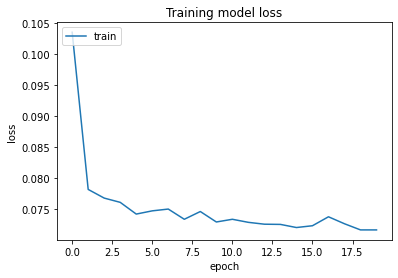

In [15]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Load the stock price test data for 2017

In [ ]:
# Load the real stock price of 2017

dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

dataset_test["Close"] = pd.to_numeric(dataset_test.Close, errors='coerce').dropna()
dataset_test = dataset_test.dropna()

dataset_test = dataset_test.iloc[:, 4 : 5].values
Y_test = dataset_test.iloc[60:, 0:].values

### Get the predicted stock price for 2017

In [ ]:
# input array for the model

inputClosing = dataset_test.iloc[:, 0 :].values
ininputClosing_scaled = sc.transform(inputClosing)
ininputClosing_scaled.shape

In [ ]:
X_test = []
length = len(dataset_test)
timestep = 60

for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i - timestep : i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

In [ ]:
predicted_stock_price = regressor.predict(X_test)

In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualize the results of predicted and real stock price

In [ ]:
# Visulizing the results

plt.plot(real_stock_price, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()